In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML
import numpy as np

# uncomment following line if nibabel is not installed
# %pip install nibabel --no-warn-script-location
import nibabel as nib
# %pip install antspyx
# import antspyx

# Gather MR Image and Atlas

In [2]:
image_path = "/data/csc4801/WangLab/HCP40_MNI_1.25mm.nii"
atlas_path = "/data/csc4801/WangLab/BNA_PM_4D.nii"

In [3]:
atlas_nii = nib.load(atlas_path)
image_nii = nib.load(image_path)

In [4]:
atlas = atlas_nii.get_fdata()
image = image_nii.get_fdata()

In [5]:
print(f"{atlas.shape=}\n{image.shape=}")

atlas.shape=(145, 173, 145, 246)
image.shape=(145, 173, 145)


## Threshold the probabilistic map

In [6]:
atlas.max()

100.0

In [8]:
atlas[atlas > 0].min()

2.5

In [9]:
threshold = 50
atlas = (atlas[:,:,:,:] > threshold).astype('int')

In [10]:
atlas[:,:,:,0].shape

(145, 173, 145)

In [11]:
image.shape

(145, 173, 145)

In [12]:
roi_0 = image * atlas[:,:,:,0]

In [13]:
roi_0.shape

(145, 173, 145)

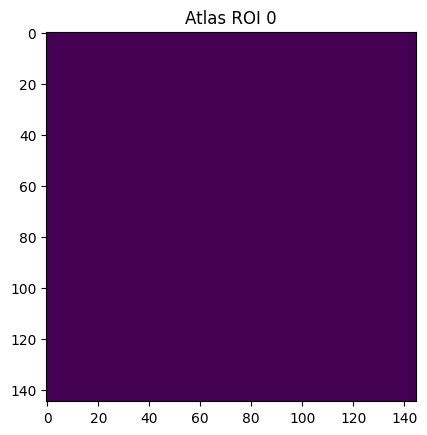

In [14]:
fig = plt.figure()
plt.title("Atlas ROI 0")
# ax = plt.axes(xlim=(0,160),
#               ylim=(0,160))
atlas_ims = []
for i in range(atlas.shape[1]):
    im = plt.imshow(atlas[:,i,:,0])
    atlas_ims.append((im,))

In [15]:
atlas_animation = ArtistAnimation(fig, atlas_ims, blit=True)

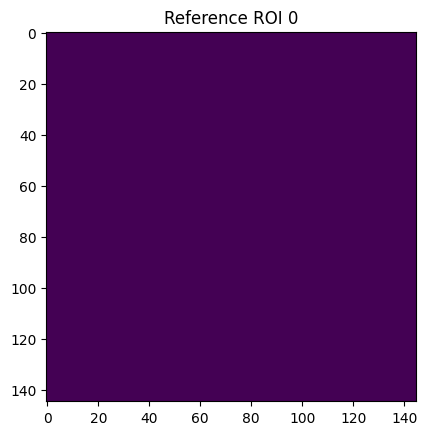

In [16]:
fig = plt.figure()
plt.title("Reference ROI 0")
# ax = plt.axes(xlim=(0,160),
#               ylim=(0,160))
roi_ims = []
for i in range(roi_0.shape[1]):
    im = plt.imshow(roi_0[:,i,:])
    roi_ims.append((im,))

In [17]:
roi_animation = ArtistAnimation(fig, roi_ims, blit=True)

In [18]:
HTML(atlas_animation.to_jshtml())

In [19]:
HTML(roi_animation.to_jshtml())

In [21]:
dest = '/data/csc4801/WangLab/reference_rois/'
os.makedirs(dest, exist_ok=True)
affine = image_nii.affine
for i in range(atlas.shape[-1]):
    atlas_roi = atlas[:,:,:,i]
    roi = image * atlas_roi
    # save to file
    ni_img = nib.Nifti1Image(roi, affine)
    nib.save(ni_img, f"{dest}{i+1}.nii")

# Split ROIs of Sample Images

In [22]:
src = '/data/csc4801/WangLab/atlas_registered_scans/'
for file in os.listdir(src):
    img = nib.load(os.path.join(src, file))
    data = img.get_fdata()
    aff = img.affine
    dest = os.path.join("/data/csc4801/WangLab/atlas_registered_rois", file.replace(".nii.gz", ""))
    os.makedirs(dest, exist_ok=True)
    for r in range(atlas.shape[-1]):
        roi = data * atlas[:,:,:,r]
        # save to file
        f = nib.Nifti1Image(roi, aff)
        nib.save(f, os.path.join(dest, f"{r+1}.nii.gz"))
    print(f"Completed {file}")

Completed ADNI_002_S_0729_MR_MPR____N3__Scaled_2_Br_20081001114302922_S17535_I118668.nii.gz
Completed ADNI_002_S_0729_MR_MPR____N3__Scaled_Br_20071027115015319_S38913_I78663.nii.gz
Completed ADNI_002_S_0729_MR_MPR____N3__Scaled_Br_20081027115509985_S56800_I124008.nii.gz
